In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    roc_auc_score
)
import shap

data = pd.read_csv('heart.csv')

In [3]:
# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [5]:
# Model Evaluation
y_pred = lr_model.predict(X_test_scaled)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.close()

Model Accuracy: 0.7951219512195122

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [6]:
# Feature Importance Analysis using Coefficients
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient Magnitude')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

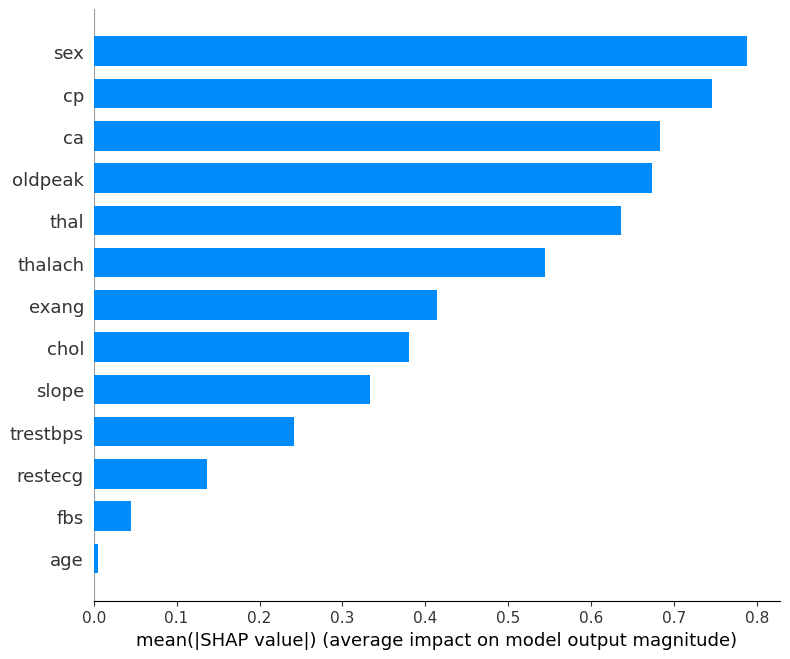


Feature Importance Ranking:
     feature  importance
2         cp    0.885835
11        ca    0.847522
1        sex    0.835665
9    oldpeak    0.765406
12      thal    0.656856
7    thalach    0.652826
4       chol    0.447276
8      exang    0.420235
10     slope    0.343605
3   trestbps    0.320053
6    restecg    0.140804
5        fbs    0.062685
0        age    0.006734


In [7]:
# SHAP Analysis
explainer = shap.LinearExplainer(lr_model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.savefig('shap_importance.png')
plt.close()

print("\nFeature Importance Ranking:")
print(feature_importance)

In [8]:
# ROC Curve
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.close()

In [10]:
# Preventive Care Strategy Recommendations
print("\nPreventive Care Strategy Recommendations:")
top_modifiable_factors = feature_importance[
    feature_importance['feature'].isin(['chol', 'trestbps', 'thalach', 'oldpeak'])
]
print(top_modifiable_factors)


Preventive Care Strategy Recommendations:
    feature  importance
9   oldpeak    0.765406
7   thalach    0.652826
4      chol    0.447276
3  trestbps    0.320053
